In [74]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [5]:
np.random.seed(42)


In [7]:
def generate_product_data(n_products=100):
    categories = ['Electronics', 'Clothing', 'Books', 'Home', 'Beauty']
    products = pd.DataFrame({

        'product_id': range(1, n_products + 1),
        'category': np.random.choice(categories, size=n_products),
        'price': np.random.uniform(10, 1000, size=n_products).round(2),
         'stock_level': np.random.randint(0, 200, size=n_products)
})
    return products

In [8]:
def generate_sales_data(products, start_date='2023-07-01', end_date='2023-12-31'):
    dates = pd.date_range(start=start_date, end=end_date)
    sales_list = []
    for date in dates:
# Generate more sales for weekends
        n_sales = np.random.randint(
    50, 100 if date.weekday() >= 5 else 80
)
        daily_sales = pd.DataFrame({
            'date': [date] * n_sales,
            'product_id': np.random.choice(products['product_id'], size=n_sales),
            'quantity': np.random.randint(1, 5, size=n_sales),
            'discount_applied': np.random.choice([0, 1], size=n_sales, p=[0.7, 0.3])
})
        sales_list.append(daily_sales)
    sales_df = pd.concat(sales_list, ignore_index=True)


In [12]:
def generate_sales_data(products, start_date='2023-07-01', end_date='2023-12-31'):
    dates = pd.date_range(start=start_date, end=end_date)
    sales_list = []
    for date in dates:
# Generate more sales for weekends
        n_sales = np.random.randint(
        50, 100 if date.weekday() >= 5 else 80
)
        daily_sales = pd.DataFrame({
        'date': [date] * n_sales,
        'product_id': np.random.choice(products['product_id'], size=n_sales),
        'quantity': np.random.randint(1, 5, size=n_sales),
        'discount_applied': np.random.choice([0, 1], size=n_sales, p=[0.7, 0.3])
})
        sales_list.append(daily_sales)
    sales_df = pd.concat(sales_list, ignore_index=True)
    sales_df['returned'] = np.random.choice(
        [0, 1],
        size=len(sales_df),
        p=[0.95, 0.05] # 5% return rate
)
    return sales_df

In [13]:

# Generate the datasets
products_df = generate_product_data()
sales_df = generate_sales_data(products_df)


In [27]:
products_df

,product_id,category,price,stock_level
0,1,Home,915.81,10
1,2,Beauty,851.54,184
2,3,Books,454.96,177
3,4,Beauty,104.46,150
4,5,Beauty,377.11,158
...,...,...,...,...
95,96,Books,105.21,157
96,97,Beauty,941.12,45
97,98,Clothing,403.60,116
98,99,Clothing,522.57,5


In [28]:
sales_df

,date,product_id,quantity,discount_applied,returned
0,2023-07-01,37,3,0,0
1,2023-07-01,24,3,0,0
2,2023-07-01,93,3,0,0
3,2023-07-01,46,4,0,0
4,2023-07-01,53,4,1,0
...,...,...,...,...,...
12261,2023-12-31,30,1,0,0
12262,2023-12-31,52,1,0,0
12263,2023-12-31,79,3,0,0
12264,2023-12-31,20,2,1,0


In [73]:
combined_df = pd.concat([sales_df, products_df])
combined_df

,date,product_id,quantity,discount_applied,returned,category,price,stock_level
0,2023-07-01,37,3.0,0.0,0.0,NaN,NaN,NaN
1,2023-07-01,24,3.0,0.0,0.0,NaN,NaN,NaN
2,2023-07-01,93,3.0,0.0,0.0,NaN,NaN,NaN
3,2023-07-01,46,4.0,0.0,0.0,NaN,NaN,NaN
4,2023-07-01,53,4.0,1.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
95,NaT,96,NaN,NaN,NaN,Books,105.21,157.0
96,NaT,97,NaN,NaN,NaN,Beauty,941.12,45.0
97,NaT,98,NaN,NaN,NaN,Clothing,403.60,116.0
98,NaT,99,NaN,NaN,NaN,Clothing,522.57,5.0


In [21]:
#basic data analysis
#cleaning empty cells
products_df_emptycells=products_df.dropna()
sales_df_emptycells=sales_df.dropna()
#data of wrong formate
sales_df_emptycells['date'] = pd.to_datetime(sales_df_emptycells['date'])
#remove duplicate values
sales_df_emptycells.duplicated()
products_df_emptycells.duplicated()
#to find out missing values
sales_df_emptycells.isnull()



,date,product_id,quantity,discount_applied,returned
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
12261,False,False,False,False,False
12262,False,False,False,False,False
12263,False,False,False,False,False
12264,False,False,False,False,False


In [ ]:
#identify missing values
products_df_emptycells.isnull()

,product_id,category,price,stock_level
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,False,False,False
96,False,False,False,False
97,False,False,False,False
98,False,False,False,False


In [35]:
#total revenue per product
revenue=products_df_emptycells['price'] * sales_df_emptycells['quantity']

In [ ]:
#top 10 by revenue
(products_df_emptycells['price'] * sales_df_emptycells['quantity']).nlargest(10)

96    3764.48
89    3439.12
99    3357.32
65    2993.28
11    2915.97
13    2898.04
63    2860.60
0     2747.43
72    2735.60
5     2688.60
dtype: float64

In [ ]:
#top 10 by quantity sold
(sales_df_emptycells.groupby('product_id')['quantity'].sum()).nlargest(10)

product_id
15    368
87    367
3     363
9     361
58    358
67    358
6     353
74    352
28    347
47    347
Name: quantity, dtype: int32

In [63]:
return_rate=(sales_df_emptycells.groupby('product_id')['returned'].sum())

In [64]:
#top 10 return rate
return_rate.nlargest(10)

product_id
21    13
9     11
64    11
92    11
98    11
1     10
25    10
58    10
71    10
77    10
Name: returned, dtype: int64

In [40]:
#monthly trend
sales_df_emptycells['month'] = sales_df_emptycells['date'].dt.month
sales_df_emptycells['year'] = sales_df_emptycells['date'].dt.year
monthly_sales = sales_df_emptycells.groupby(['year', 'month'])['quantity'].sum().reset_index()

In [71]:


g = combined_df.groupby("product_id")

disc_prod = g['discount_applied'].apply(lambda x: (1-x).prod())
budget = g['price'].first()
result = disc_prod * budget
result


product_id
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
96     0.0
97     0.0
98     0.0
99     0.0
100    0.0
Length: 100, dtype: float64

In [41]:
monthly_sales

,year,month,quantity
0,2023,7,5146
1,2023,8,4999
2,2023,9,5055
3,2023,10,5109
4,2023,11,5003
5,2023,12,5245


In [45]:
#total revenue
revenue.sum()

np.float64(115025.92)

In [ ]:
#average order size
(sales_df_emptycells.groupby('product_id')['quantity'].mean())

product_id
1      2.467153
2      2.617647
3      2.669118
4      2.316239
5      2.386555
         ...   
96     2.435714
97     2.420635
98     2.376000
99     2.300813
100    2.438776
Name: quantity, Length: 100, dtype: float64

Text(0.5, 1.0, 'Distribution of revenue')

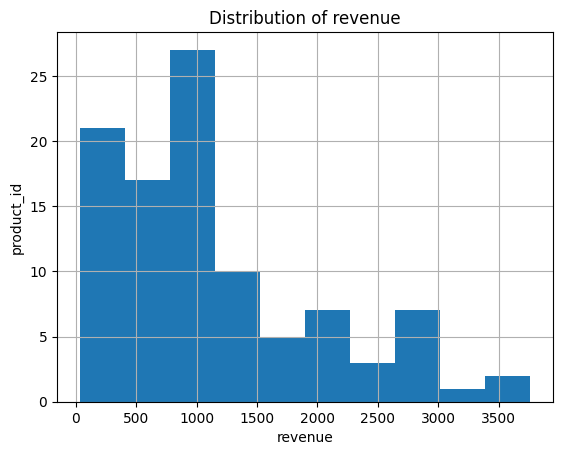

In [ ]:
#revenue distribution
import matplotlib.pyplot as plt
revenue.hist()

# add labels and title
plt.xlabel('revenue')
plt.ylabel('product_id')
plt.title('Distribution of revenue')

Text(0.5, 1.0, 'monthly sales')

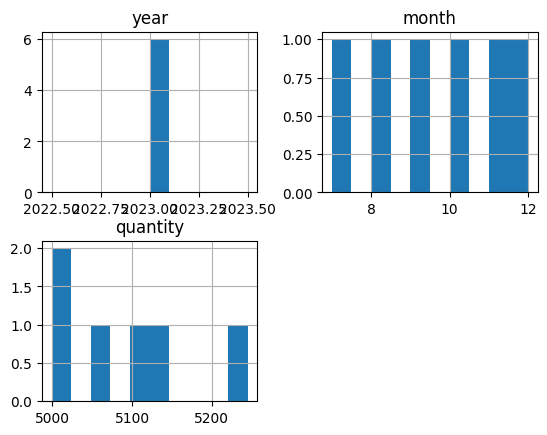

In [67]:
#monthly sales distribution
monthly_sales.hist()

# add labels and title
plt.xlabel('product_id')
plt.ylabel('quantity')
plt.title('monthly sales')

Text(0.5, 1.0, 'monthly sales')

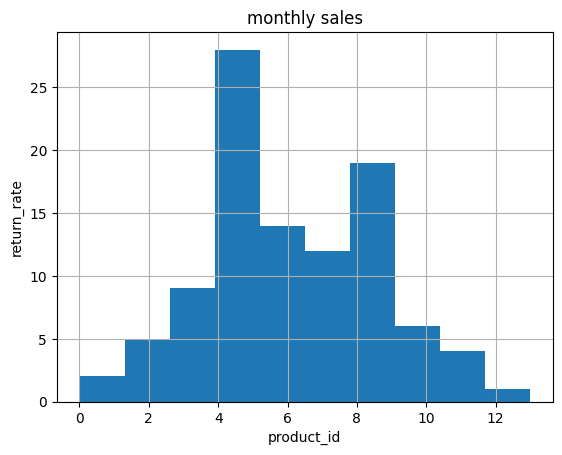

In [ ]:
#return rate by category
return_rate.hist()

# add labels and title
plt.xlabel('product_id')
plt.ylabel('return_rate')
plt.title('monthly sales')